In [14]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

In [37]:
# Use a raw string (r') or double backslashes (\\) for the Windows path
conn = sqlite3.connect(r'C:\Users\samii\Documents\maestria\fundamentals_DC\lab_1\your_database.db')

# Check available tables
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query_tables, conn)

print("Available Tables:")
print(tables)

# Replace 'your_table_name' with your actual table name
df = pd.read_sql_query('SELECT * FROM Online_Retail;', conn)

# Display first 5 rows
print(df.head())


Available Tables:
            name
0  Online_Retail
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

                  InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-01 08:26:00.000000       2.55     17850.0  United Kingdom   
1  2010-12-01 08:26:00.000000       3.39     17850.0  United Kingdom   
2  2010-12-01 08:26:00.000000       2.75     17850.0  United Kingdom   
3  2010-12-01 08:26:00.000000       3.39     17850.0  United Kingdom   
4  2010-12-01 08:26:00.000000       3.39     17850.0  United Kingdom   

   TotalValue  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4 

In [58]:
# Convert to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get mean and max
mean_date = df['InvoiceDate'].mean()
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print("Mean (average) date:", mean_date)
print("Oldest (min) date:", min_date)
print("Latest (max) date:", max_date)


Mean (average) date: 2011-07-04 20:16:05.225087744
Oldest (min) date: 2010-12-01 08:26:00
Latest (max) date: 2011-12-09 12:50:00


In [59]:
df.shape

(530104, 11)

## Analisis de el dataset
El dataset 'Online_Retail' contiene 530 104 registros de transacciones de una tienda minorista en línea con sede en el Reino Unido, que abarcan el periodo comprendido entre el 1 de diciembre de 2010 y el 9 de diciembre de 2011. Documenta compras individuales realizadas por clientes de varios países, aunque la mayoría de las transacciones se concentran en el Reino Unido. Los datos parecen pueden dar pie a tareas como el análisis de ventas, la elaboración de perfiles de clientes o el desarrollo de estrategias empresariales.

| Campo | Descripción
|--------------|-----------------------------------------------------------------------------|
| InvoiceNo| Un identificador único para cada transacción. Se repite para facturas de varios artículos. |
| StockCode | El código interno utilizado para identificar el producto.                             |
| Descripcion| Descripción del producto adquirido.                                |
| Quantity | Número de unidades vendidas. Los valores negativos indican devoluciones.                     |
| InvoiceDate| Fecha y hora de la transacción. Útil para el análisis de series temporales.          |
| UnitPrice | Precio por unidad (en GBP).                                                    |
| CustomerID| ID único para cada cliente. Los valores perdidos pueden representar compras de invitados.
| Country| País en el que se encuentra el cliente.                                      |
| TotalValue | Valor calculado, producto de Cantidad y Precio unitario. Refleja el valor de la transacción. |


**De este conjunto de datos pueden derivarse varias características de metadatos e insights:**

1. Características temporales:

* Año, mes, día y hora a partir de InvoiceDate.

* Compras entre semana frente a compras en fin de semana.

* Tendencias de ventas a lo largo del tiempo.

2. Comportamiento del cliente:

* Gasto total por cliente.

* Frecuencia de compra.

* Tamaño medio de la canasta de compras.

3. Estadísticas a nivel de producto:

* Artículos más vendidos.

* Ventas por país.

4. Estadísticas por país:

* Ingresos totales por país.

* Valor medio de las transacciones.

In [38]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Year-Month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and sum Quantity
monthly_quantity = df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_quantity['YearMonth'] = monthly_quantity['YearMonth'].dt.to_timestamp()

monthly_quantity.head()

,YearMonth,Quantity
0,2010-12-01,359239
1,2011-01-01,387785
2,2011-02-01,283555
3,2011-03-01,377526
4,2011-04-01,308815


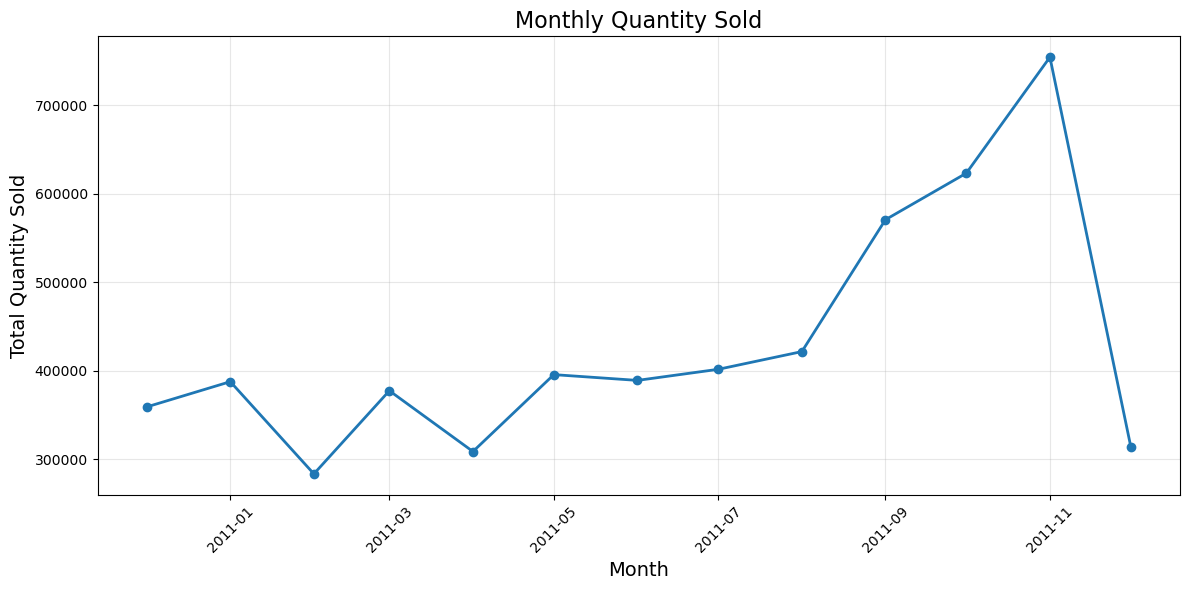

In [39]:
plt.figure(figsize=(12,6))
plt.plot(monthly_quantity['YearMonth'], monthly_quantity['Quantity'], marker='o', linestyle='-', linewidth=2)

plt.title('Monthly Quantity Sold', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)

plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


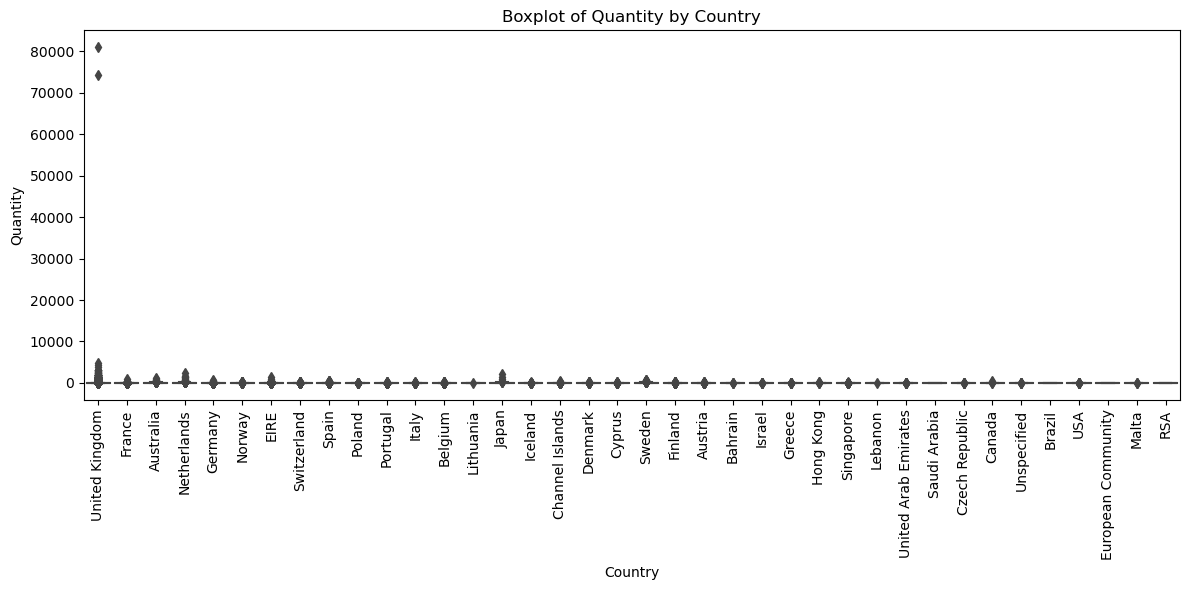

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Quantity', data=df)

plt.xticks(rotation=90)
plt.title('Boxplot of Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

In [54]:
df_fil = df[df['Quantity'] < 20]

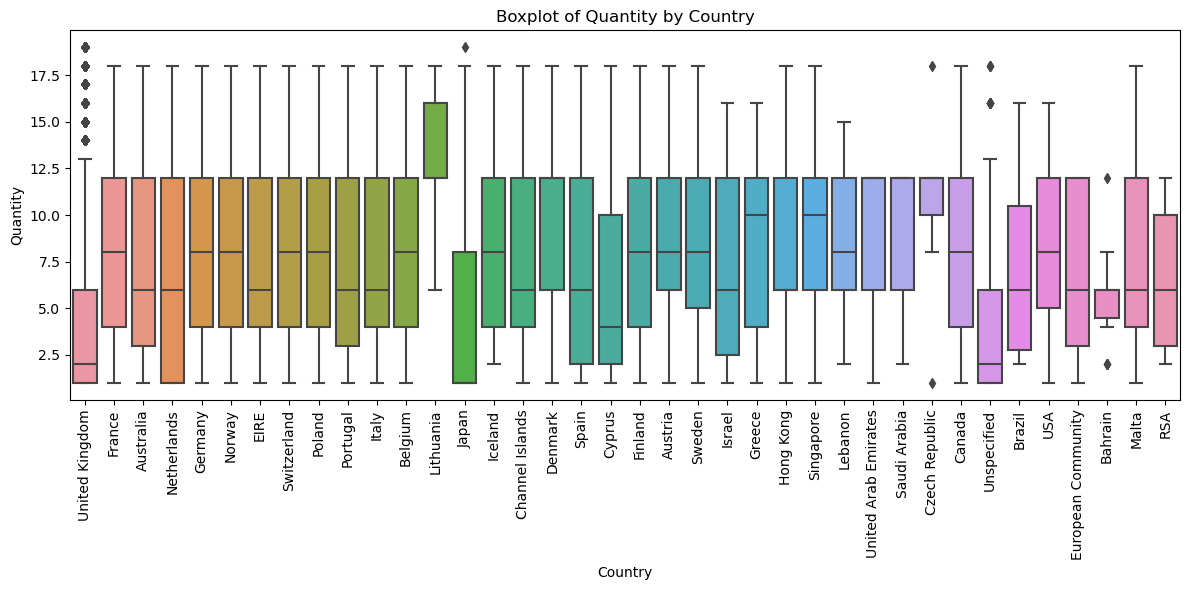

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Quantity', data=df_fil)

plt.xticks(rotation=90)
plt.title('Boxplot of Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

In [42]:
# Optionally: only normalize numeric columns automatically
df_normalized = df.copy()
numeric_df = df_normalized.select_dtypes(include='number')
df_normalized[numeric_df.columns] = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())

print(df_normalized.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.000062   
1    536365     71053                  WHITE METAL LANTERN  0.000062   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.000086   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.000062   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.000062   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalValue  \
0 2010-12-01 08:26:00   0.000188    0.976105  United Kingdom    0.000091   
1 2010-12-01 08:26:00   0.000250    0.976105  United Kingdom    0.000121   
2 2010-12-01 08:26:00   0.000203    0.976105  United Kingdom    0.000131   
3 2010-12-01 08:26:00   0.000250    0.976105  United Kingdom    0.000121   
4 2010-12-01 08:26:00   0.000250    0.976105  United Kingdom    0.000121   

  YearMonth  
0   2010-12  
1   2010-12  
2   2010-12  
3   2010-12  
4   2010-12  


In [43]:
df_filtered = df_normalized[df_normalized['Quantity'] < 0.003]

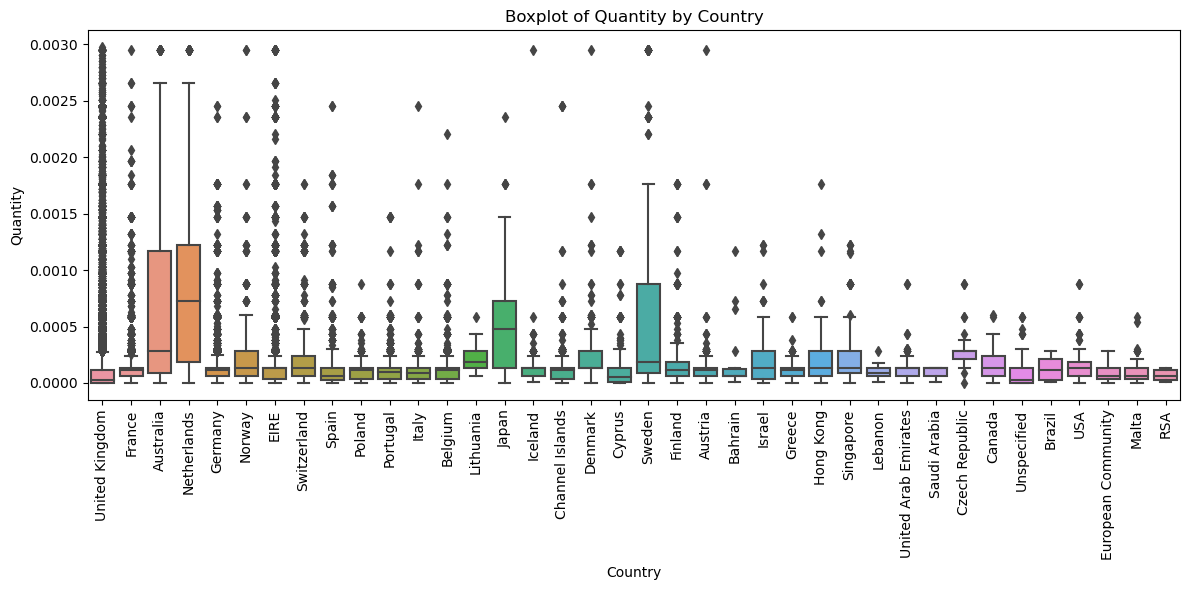

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Quantity', data=df_filtered)

plt.xticks(rotation=90)
plt.title('Boxplot of Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

Analisis del boxplot:
* La mayoria de paises muestran una distribucion positiva. La mayoria de la cantidad en ventas se encuentra concetrada en valores bajos (tipicamente menores a 20). Una caracteristica es que tenemos una alta taza de outliers. Esto ssugiere que la mayoria de compras son pequenas, con algunas transacciones grandes.

* Los outliers son comunes y frecuentes, los puntos negros representan los outliers, y casi todos los paises muestran muchos de ellos. Esto se puede traducir en cantidades extremadamente altas, posiblemente pedidos en masa o registros anomalos.

* Quien domina en volumen de trrransacciones es United Kingdom. Tambien para podere visualizar mejor los boxplots se delimito el eje y, lo que en esta grafica no nos permite observar los outliers con cantidades mayores.

* Paises como Francia, Australia y Netherllands thambien muestran variabilidad en la cantidad de items comprados comparados con otros.

* Paises como Malta, Brasil y Finlandia muestra cajas mas pequenas y condensadas, con cantidad de outliers moderados. 

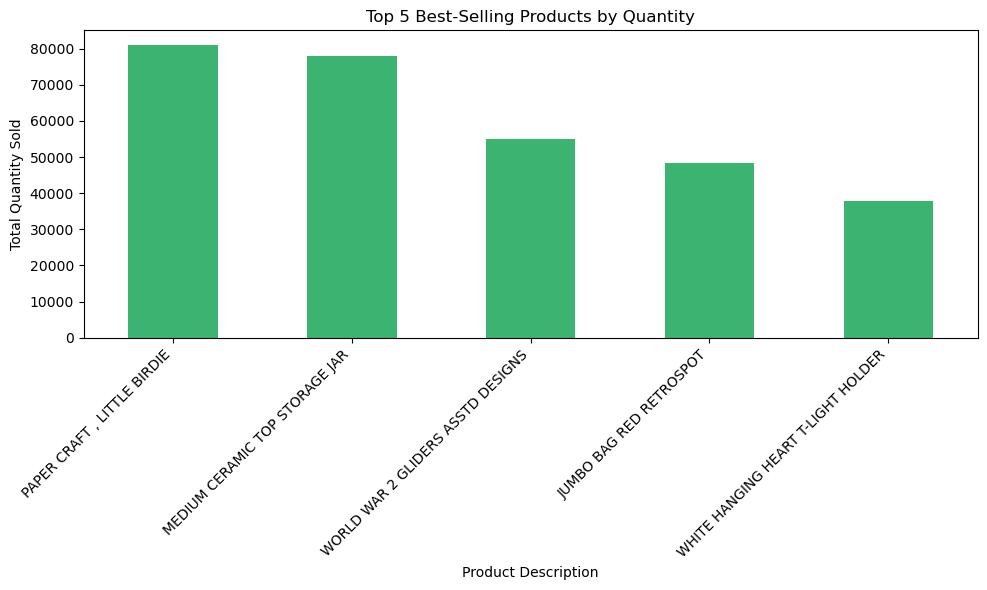

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by product description and sum quantities
top_sellers = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

# Bar plot
plt.figure(figsize=(10,6))
top_sellers.plot(kind='bar', color='mediumseagreen')

plt.title('Top 5 Best-Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


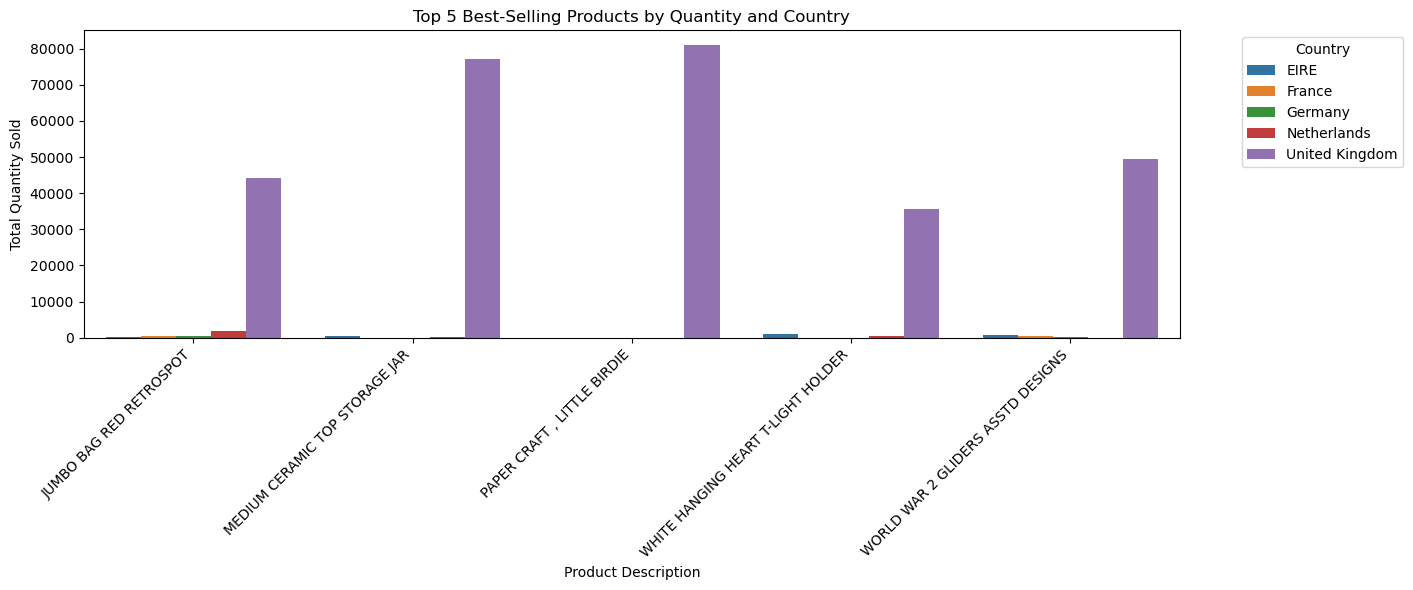

In [49]:
# 1. Get top 5 products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).index.tolist()

# 2. Get top 5 countries by total quantity sold
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5).index.tolist()

# 3. Filter the DataFrame
df_filtered = df[df['Description'].isin(top_products) & df['Country'].isin(top_countries)]

# 4. Group by Description and Country
grouped = df_filtered.groupby(['Description', 'Country'])['Quantity'].sum().reset_index()

# 5. Plot
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='Description', y='Quantity', hue='Country')

plt.title('Top 5 Best-Selling Products by Quantity and Country')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


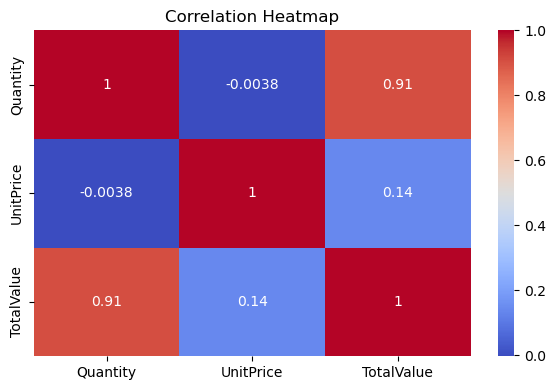

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalValue']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


En el mapa de correlaciones, observamos una correlación positiva muy fuerte (0,91) entre Cantidad y ValorTotal, lo que confirma que el valor total depende principalmente del número de artículos comprados. Por el contrario, casi no existe relación entre Cantidad y Precio unitario, lo que sugiere que el precio no influye significativamente en el número de artículos comprados. La débil correlación (0,14) entre el precio unitario y el valor total indica que el precio unitario tiene un impacto limitado en el importe total de las ventas, probablemente debido a que la mayoría de las compras son de artículos de gran cantidad y bajo coste.